In [241]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import combineArray, multiArraySort, data_loader_from_csv, data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Spring: Distance - Pathloss

In [246]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sp_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sp_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sp_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


[Iksan-spring]Relu


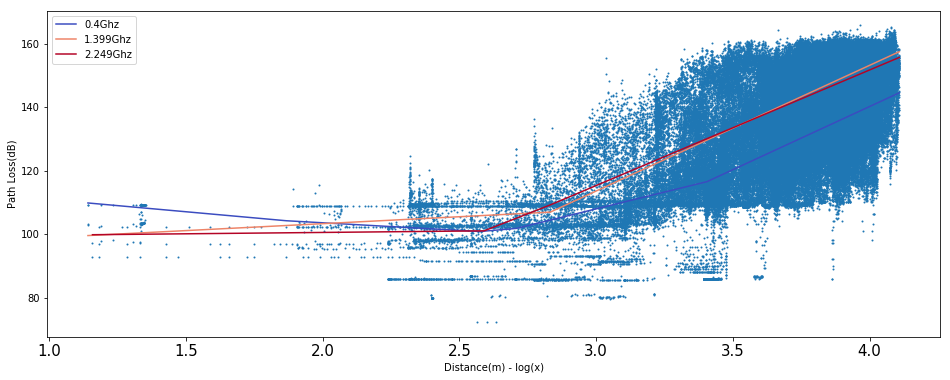

RMSE(dB),train error,val error
0.4Ghz,10.18633,10.12006
1.399Ghz,9.72684,9.82360
2.249Ghz,9.27079,9.24153


In [250]:
%autoreload
print("[Iksan-spring]Relu - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Spring: Antenna - Pathloss

In [251]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sp_400.csv', 400, 'height')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sp_1399.csv', 1399,'height')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sp_2249.csv', 2249,'height')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


In [ ]:
%autoreload
print("[Iksan-spring]Sigmoid - Moving | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logsitic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logsitic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logsitic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Sigmoid - Stationary | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Summer: Distance - Pathloss

In [246]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sm_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sm_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sm_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


[Iksan-spring]Relu


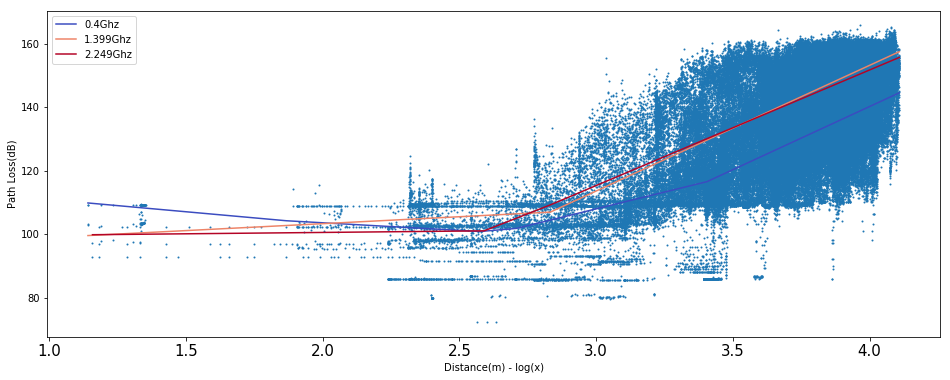

RMSE(dB),train error,val error
0.4Ghz,10.18633,10.12006
1.399Ghz,9.72684,9.82360
2.249Ghz,9.27079,9.24153


In [250]:
%autoreload
print("[Iksan-spring]Relu - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Summer: Antenna - Pathloss

In [251]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sm_400.csv', 400, 'height')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sm_1399.csv', 1399,'height')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sm_2249.csv', 2249,'height')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


In [ ]:
%autoreload
print("[Iksan-summer]Sigmoid - Moving | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logsitic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logsitic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logsitic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-summer]Sigmoid - Stationary | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Winter: Distance-Pathloss

In [246]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_wt_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_wt_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_wt_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


[Iksan-spring]Relu


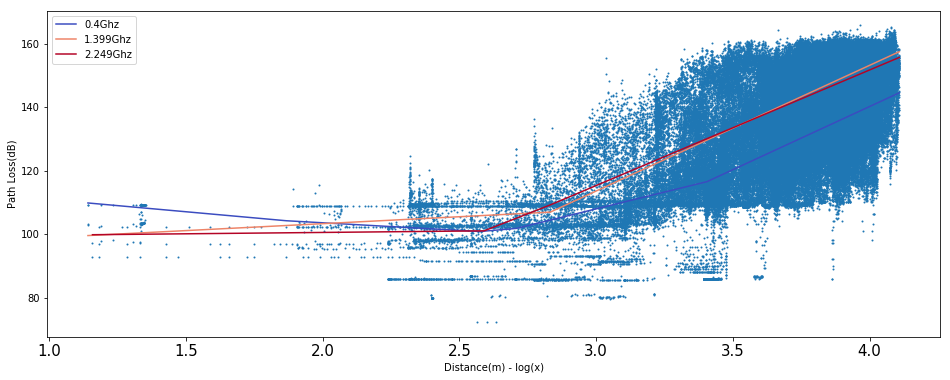

RMSE(dB),train error,val error
0.4Ghz,10.18633,10.12006
1.399Ghz,9.72684,9.82360
2.249Ghz,9.27079,9.24153


In [250]:
%autoreload
print("[Iksan-spring]Relu - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60,60,60,60,60,60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Winter: Antenna - Pathloss

In [251]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_wt_400.csv', 400, 'height')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_wt_1399.csv', 1399,'height')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_wt_2249.csv', 2249,'height')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


In [ ]:
%autoreload
print("[Iksan-winter]Sigmoid - Moving | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logsitic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logsitic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logsitic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Iksan-winter]Sigmoid - Stationary | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))